# Perceptron 



We will implement and train this model on the palmerpenguins dataset, and get started by running the following code in the cell below.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

The Perceptron is used on binary classification problems. Thus, we need to choose two of the three species of penguins to implement and train the perceptron on. For our purposes we will focus on "Adelie" and "Chinstrap" penguin species. The data for these two species are contained in the first 219 rows of data in df. Try running the following code in the cell below.

## Data preprocessing

In [19]:
df = df.iloc[:220]
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We use the head method to know the dataset. Rows with NAN should be dropped at first. 

In [20]:
df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [21]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "bill_length" and "bill_depth". Moreover, we need to also convert the string names associated with each species to numerical values; for example, map "Adelie" species to -1 and "Chinstrap" species to 1. The following code preproccesses our data into these desired formats.

In [22]:
# Store the desired species values in the numpy array y
y = df.species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "bill_depth_mm"]].values

We can preview the y and X at first

In [21]:
#y
#X

array([[39.1, 18.7],
       [39.5, 17.4],
       [40.3, 18. ],
       [36.7, 19.3],
       [39.3, 20.6],
       [38.9, 17.8],
       [39.2, 19.6],
       [41.1, 17.6],
       [38.6, 21.2],
       [34.6, 21.1],
       [36.6, 17.8],
       [38.7, 19. ],
       [42.5, 20.7],
       [34.4, 18.4],
       [46. , 21.5],
       [37.8, 18.3],
       [37.7, 18.7],
       [35.9, 19.2],
       [38.2, 18.1],
       [38.8, 17.2],
       [35.3, 18.9],
       [40.6, 18.6],
       [40.5, 17.9],
       [37.9, 18.6],
       [40.5, 18.9],
       [39.5, 16.7],
       [37.2, 18.1],
       [39.5, 17.8],
       [40.9, 18.9],
       [36.4, 17. ],
       [39.2, 21.1],
       [38.8, 20. ],
       [42.2, 18.5],
       [37.6, 19.3],
       [39.8, 19.1],
       [36.5, 18. ],
       [40.8, 18.4],
       [36. , 18.5],
       [44.1, 19.7],
       [37. , 16.9],
       [39.6, 18.8],
       [41.1, 19. ],
       [36. , 17.9],
       [42.3, 21.2],
       [39.6, 17.7],
       [40.1, 18.9],
       [35. , 17.9],
       [42. ,

Before using Perceptron to get the decision region, we can first visualize these two species based on bill_length and bill_depth

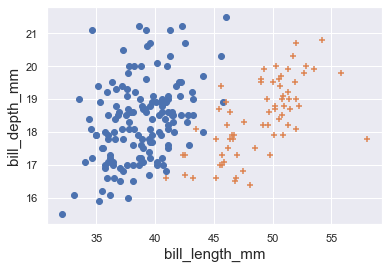

In [23]:
# Distinguish between positive and negative samples
posi_x = df[df["species"] == "Adelie"][["bill_length_mm", "bill_depth_mm"]].values
nega_x = df[df["species"] == "Chinstrap"][["bill_length_mm", "bill_depth_mm"]].values

plt.figure(figsize = (6,4))
plt.scatter(posi_x[ ...,0],posi_x[ ...,1],
        marker = 'o')
plt.scatter(nega_x[ ...,0],nega_x[ ...,1],
        marker = '+')
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.show()

From the plot above, there is clear distinction between Adelie species penguin and Chinstrap species penguin. Then, we can use the perceptron to obtain the decision region.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 3)

## Algorithm application

Thus, we next write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method. Please run the following code in the cell below.

In [7]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Next we can instantiate an instance of the Perceptron class and also train this instance over 2500 epochs by running the following code in the cell below.

In [25]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 2500)

# Call the train method to train the weights and bias of the given instance
percep.train(X_train, y_train)

After training has finished we can call the Perceptron class predict method to view its current predictions given input features. We can quickly view these predictions on the entries in X by running the following code in the cell below.

In [26]:
# Predict labels on the features in X_test
y_hat = percep.predict(X_test)

# Compare y_hat and y
print(y_test == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the plot_decision_regions function imported at the top of this notebook. This function will scatter the penguins data in the plane and also show the regions of space where a given point will be classified either -1 or 1. It super easy to use and I'm glad I found it! Try running the following code in the cell below.

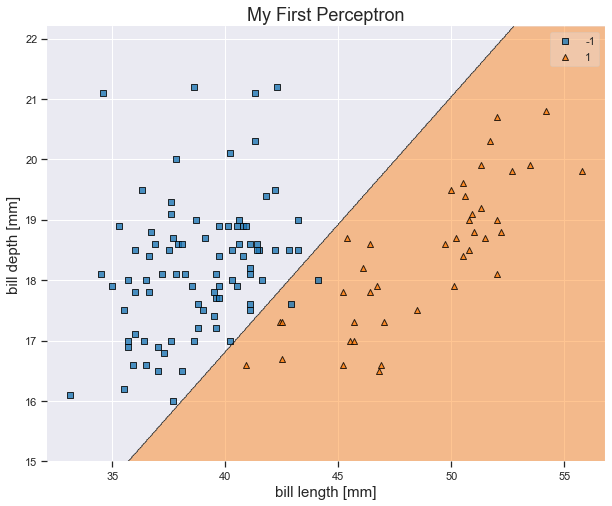

In [28]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_train, y_train, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

## Error Analysis

As you can see from the output of the code above, we have found a nice linear seperator which has classified our data. But how long did our perceptron model train for? Luckily, when we defined our Perceptron class we stored the error incured by the model at each iteration of an epoch in the errors_ attribute. We can view these errors over each epoch by running the following code in the cell below.

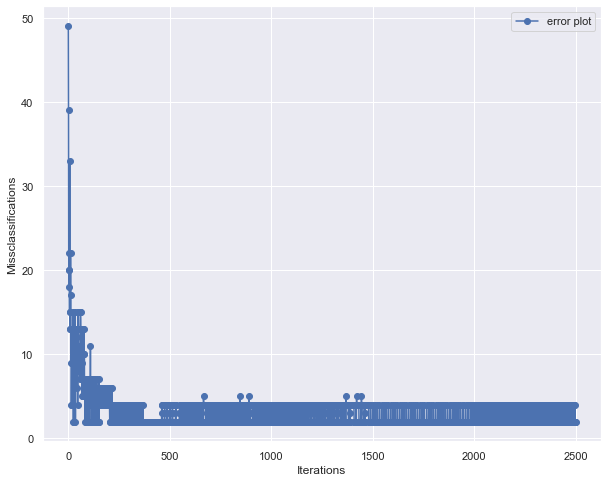

In [29]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()


From classification accuracy the plot above shows, it seems that missclassification is around 3 and 4 which is also a good performance considering the total sample is 214. There is cliff drop of error when iterations is more than 500.

<AxesSubplot:>

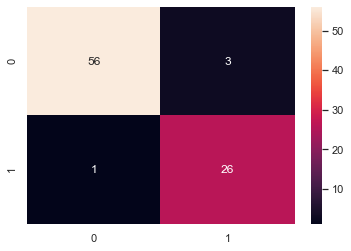

In [30]:
from  sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_hat)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(matrix)


sns.heatmap(matrix_df, annot = True)

In [31]:
from sklearn.metrics import classification_report

print(f"Perceptron Classification Report")
print(classification_report(y_test, y_hat), "\n")

Perceptron Classification Report
              precision    recall  f1-score   support

          -1       0.98      0.95      0.97        59
           1       0.90      0.96      0.93        27

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86
 



From the classfication report and confusion matrix, we can see that the accuracy is good.